In [ ]:
print('''   Real-Time Sales Data Analysis and Insights
Problem Statement:

You are working for a retail company that wants to gain
insights into their sales performance across different stores and products. The
company has been collecting real-time sales data from multiple stores, and
your task is to clean, process, and analyze the data to derive meaningful
insights and create visual representations. \n\n''')

print("Task's to be done are :\n1.Data Cleaning\n2.Data Aggregation\n3.Analysis\n4.Data Visualization")



   Real-Time Sales Data Analysis and Insights         
Problem Statement: 

You are working for a retail company that wants to gain 
insights into their sales performance across different stores and products. The 
company has been collecting real-time sales data from multiple stores, and 
your task is to clean, process, and analyze the data to derive meaningful 
insights and create visual representations. 


Task's to be done are :
1.Data Cleaning
2.Data Aggregation
3.Analysis
4.Data Visualization


In [ ]:
print("....PRIYA RAI 24MAI0070... \n")

....PRIYA RAI 24MAI0070... 



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [15]:
sales_data = pd.read_csv('/content/de _sales_data.csv',parse_dates=['Date'])

In [13]:
sales_data.head()


,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,18-03-2023,4,16,71.0,411.924008,13.675356,Wholesale
1,07-01-2023,2,3,58.0,219.536640,5.621470,Premium
2,06-01-2023,1,1,31.0,220.954196,10.881928,Regular
3,30-01-2023,3,17,53.0,467.144190,12.648030,Regular
4,27-01-2023,3,18,5.0,158.646796,10.518222,Premium


In [14]:
sales_data.tail()


,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
95,04-03-2023,3,10,2.0,450.868637,5.576870,Premium
96,16-03-2023,3,16,29.0,270.740270,5.018326,Premium
97,28-01-2023,4,14,62.0,216.320653,13.546608,Wholesale
98,22-03-2023,4,18,18.0,481.603258,6.640378,Premium
99,17-03-2023,2,6,40.0,63.136830,9.134476,Wholesale


In [17]:
sales_data.shape

(100, 7)

In [18]:

sales_data.columns

Index(['Date', 'Store ID', 'Product ID', 'Units Sold', 'Sales Amount',
       'Discount Applied', 'Customer Segment'],
      dtype='object')

In [19]:
sales_data.describe()

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied
count,100,100.000000,100.000000,99.000000,100.000000,100.000000
mean,2023-02-21 20:38:24,2.540000,10.520000,44.212121,268.887248,10.523890
min,2023-01-02 00:00:00,1.000000,1.000000,1.000000,54.637579,5.018326
25%,2023-01-29 18:00:00,1.750000,5.000000,13.000000,165.406834,8.544908
50%,2023-02-23 00:00:00,3.000000,11.000000,43.000000,263.677498,10.494331
75%,2023-03-14 06:00:00,4.000000,16.000000,68.500000,381.133086,12.857686
max,2023-04-10 00:00:00,4.000000,19.000000,99.000000,495.815543,14.891980
std,NaN,1.131906,5.895521,31.201214,132.826337,2.724588


 checking for presence of null value

In [20]:

print(sales_data.isnull().sum())

Date                0
Store ID            0
Product ID          0
Units Sold          1
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64



### **Task 1 : Data Cleaning**

 ( i ) Handling Missing Values through KNN Imputation

In [34]:
#Using KNN Imputer for missing values
numeric_cols = ['Units Sold', 'Sales Amount', 'Discount Applied']
imputer = KNNImputer(n_neighbors=5)
sales_data[numeric_cols] = imputer.fit_transform(sales_data[numeric_cols]
)

In [27]:
missing_sales_data = sales_data[sales_data['Sales Amount'].isna()]
if not missing_sales_data.empty:
    known_data = sales_data[sales_data['Sales Amount'].notna()]
    X_known = known_data[['Units Sold', 'Discount Applied']]
    y_known = known_data['Sales Amount']
    model = LinearRegression()
    model.fit(X_known, y_known)
    X_missing = missing_sales_data[['Units Sold', 'Discount Applied']]
    sales_data.loc[sales_data['Sales Amount'].isna(), 'Sales Amount'] = model.predict(X_missing)

In [28]:
#data quality report

quality_report = sales_data.isnull().sum().reset_index()
quality_report.columns = ['Column', 'Missing Values']
quality_report['% Missing'] = (quality_report['Missing Values'] / len(sales_data)) * 100
print("Data Quality Report:\n", quality_report)

Data Quality Report:
              Column  Missing Values  % Missing
0              Date               0        0.0
1          Store ID               0        0.0
2        Product ID               0        0.0
3        Units Sold               0        0.0
4      Sales Amount               0        0.0
5  Discount Applied               0        0.0
6  Customer Segment               0        0.0


In [29]:
## Convert 'Date' to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

(ii) Outlier Detection and Visualization

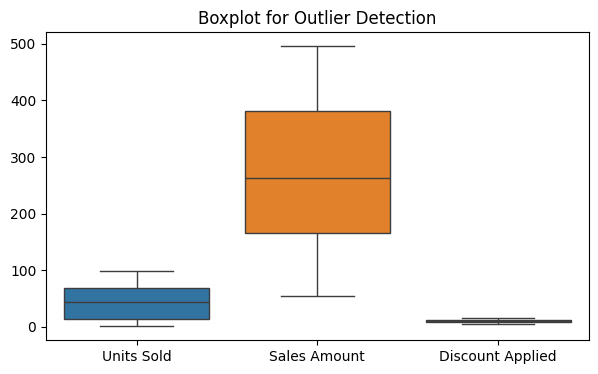

In [37]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=sales_data[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()


( iii )  Checking for Incorrect Formats

In [39]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')
print(sales_data.dtypes)

Date                datetime64[ns]
Store ID                     int64
Product ID                   int64
Units Sold                 float64
Sales Amount               float64
Discount Applied           float64
Customer Segment            object
dtype: object



## **Task 02 : Data Aggregation**


( i ) Aggregation by Customer Segment


In [40]:
customer_segment_agg = sales_data.groupby('Customer Segment').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Avg_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Customer Segment Aggregation:\n", customer_segment_agg)

Customer Segment Aggregation:
   Customer Segment   Total_Sales   Avg_Sales   Units_Sold
0          Premium  11801.014306  268.204871  1708.212121
1          Regular   7213.928620  300.580359  1073.000000
2        Wholesale   7873.781906  246.055685  1640.000000


( ii ) Weekly and Monthly Aggregation

In [46]:
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Month'] = sales_data['Date'].dt.month
weekly_sales = sales_data.groupby('Week').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()
monthly_sales = sales_data.groupby('Month').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()

print("Weekly Sales:\n\n", weekly_sales)
print("\n")
print("Monthly Sales:\n\n", monthly_sales)

Weekly Sales:

     Week  Total_Sales
0      1  1735.293049
1      2   701.444862
2      3  1675.355490
3      4  2470.357063
4      5  1821.688845
5      6   711.004937
6      7  2682.294770
7      8  2651.900459
8      9  2510.940930
9     10  1804.759205
10    11  2890.572103
11    12  2106.210268
12    13  1011.081201
13    14  1626.677763
14    15   489.143885


Monthly Sales:

    Month  Total_Sales
0      1  7474.693572
1      2  7355.489793
2      3  9831.190709
3      4  2227.350758



( iii ) Aggregate by Date, Store, and Product

In [50]:
date_agg = sales_data.groupby('Date').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Daily Aggregation:\n\n", date_agg.head())

print("\n\n")

store_agg = sales_data.groupby('Store ID').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Store Aggregation:\n\n", store_agg)

print("\n\n")

product_agg = sales_data.groupby('Product ID').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Product Aggregation:\n\n", product_agg)

Daily Aggregation:

         Date  Total_Sales  Average_Sales  Units_Sold
0 2023-01-02   467.144190     467.144190        82.0
1 2023-01-03   386.241419     386.241419        68.0
2 2023-01-06   549.632174     274.816087        41.0
3 2023-01-07   219.536640     219.536640        58.0
4 2023-01-08   112.738626     112.738626        14.0



Store Aggregation:

    Store ID  Total_Sales  Average_Sales   Units_Sold
0         1  6466.822453     258.672898  1116.000000
1         2  5718.173862     259.916994  1078.000000
2         3  7014.191716     259.784878  1113.212121
3         4  7689.536802     295.751415  1114.000000



Product Aggregation:

     Product ID  Total_Sales  Average_Sales  Units_Sold
0            1  1746.587614     349.317523  160.000000
1            2  1694.423690     242.060527  419.000000
2            3  1672.107751     278.684625  205.000000
3            4   679.607829     226.535943  100.000000
4            5  1263.376734     180.482391  205.000000
5            6  



## **Task 03 : Analysis**

( i )Calculating total sales and average sales per product


In [52]:
total_sales_per_product = product_agg[['Product ID', 'Total_Sales', 'Average_Sales']]
print("Total and Average Sales per Product:\n\n", total_sales_per_product)

Total and Average Sales per Product:

     Product ID  Total_Sales  Average_Sales
0            1  1746.587614     349.317523
1            2  1694.423690     242.060527
2            3  1672.107751     278.684625
3            4   679.607829     226.535943
4            5  1263.376734     180.482391
5            6   608.787268     121.757454
6            7  1389.605676     347.401419
7            8   493.529786     246.764893
8            9  1802.945915     360.589183
9           10  1565.412341     313.082468
10          11  1231.427350     307.856838
11          12   380.843889     380.843889
12          13  1246.875581     311.718895
13          14  1565.645334     223.663619
14          15  1396.259527     232.709921
15          16  2527.478663     280.830963
16          17  2613.329134     326.666142
17          18  1573.938968     314.787794
18          19  1436.541783     205.220255


( ii )  Identifying the store with the highest sales performance.

In [54]:
# Identify the store with the highest sales performance
top_store = store_agg.loc[store_agg['Total_Sales'].idxmax()]
print("Top Performing Store:\n\n", top_store)

Top Performing Store:

 Store ID            4.000000
Total_Sales      7689.536802
Average_Sales     295.751415
Units_Sold       1114.000000
Name: 3, dtype: float64



( iii ) Analyze the impact of discounts on sales amounts

In [55]:
sales_data['Discount Change'] = sales_data['Discount Applied'].pct_change()
sales_data['Sales Change'] = sales_data['Sales Amount'].pct_change()
sales_data['Elasticity'] = sales_data['Sales Change'] / sales_data['Discount Change']
print("Discount Elasticity of Demand:\n", sales_data[['Discount Applied', 'Sales Amount', 'Elasticity']].dropna())

Discount Elasticity of Demand:
     Discount Applied  Sales Amount  Elasticity
1           5.621470    219.536640    0.793035
2          10.881928    220.954196    0.006900
3          12.648030    467.144190    6.865279
4          10.518222    158.646796    3.921779
5          13.546608    294.245959    2.968635
..               ...           ...         ...
95          5.576870    450.868637   -0.413138
96          5.018326    270.740270    3.989009
97         13.546608    216.320653   -0.118277
98          6.640378    481.603258   -2.405472
99          9.134476     63.136830   -2.313398

[99 rows x 3 columns]


growth analysis

In [57]:
sales_data['Cumulative Sales'] = sales_data['Sales Amount'].cumsum()


sales_data['Cumulative Sales']

,Cumulative Sales
0,411.924008
1,631.460648
2,852.414844
3,1319.559034
4,1478.205830
...,...
95,25856.923822
96,26127.664092
97,26343.984745
98,26825.588002


In [58]:
discounted_sales = sales_data[sales_data['Discount Applied'] > 0]['Sales Amount'].sum()
non_discounted_sales = sales_data[sales_data['Discount Applied'] == 0]['Sales Amount'].sum()
print("Discounted Sales Total:", discounted_sales)
print("Non-Discounted Sales Total:", non_discounted_sales)

Discounted Sales Total: 26888.724832069995
Non-Discounted Sales Total: 0.0


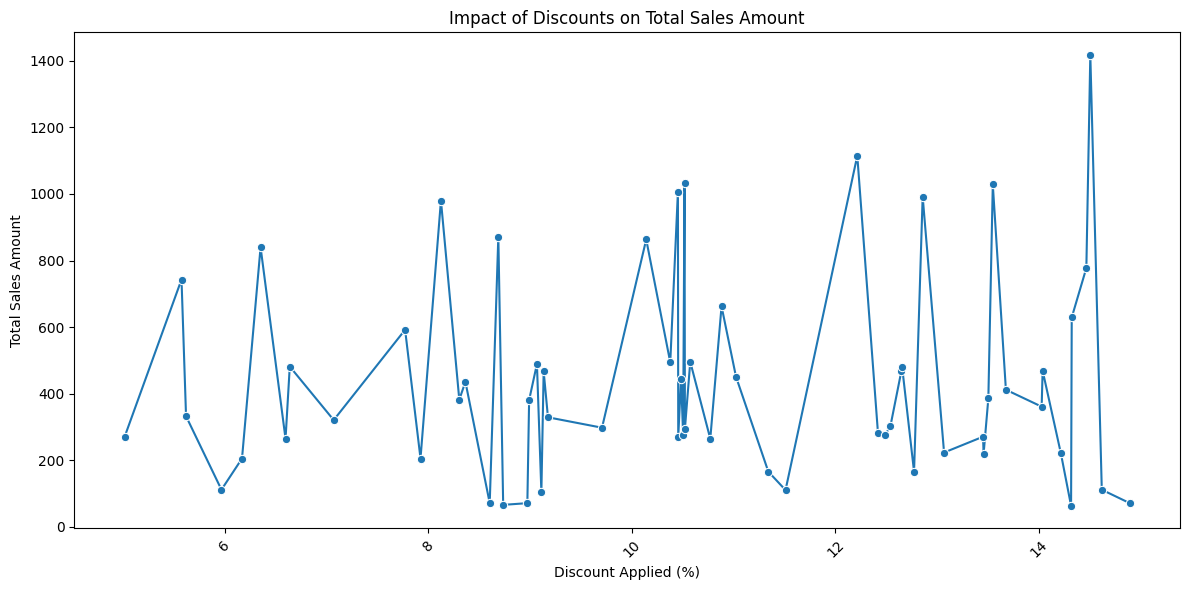

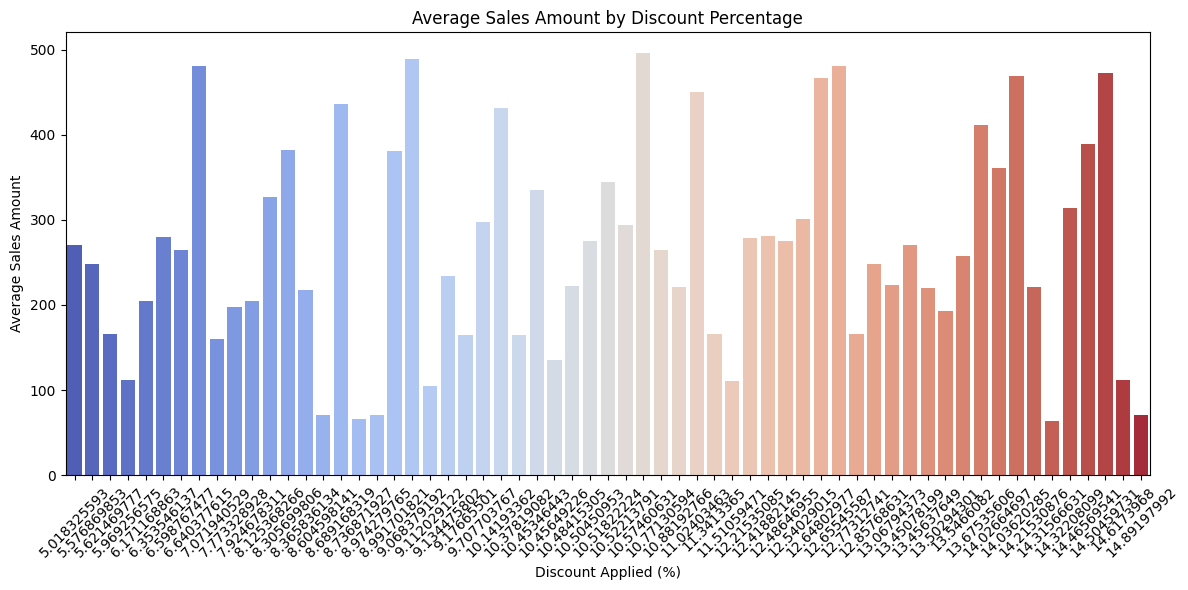

In [61]:
# Creating the discounted_sales DataFrame with total and average sales by discount

discounted_sales = sales_data.groupby('Discount Applied').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean')
).reset_index()

# Then Plotting Total Sales by Discount Applied
plt.figure(figsize=(12, 6))
sns.lineplot(data=discounted_sales, x='Discount Applied', y='Total_Sales', marker='o')
plt.title('Impact of Discounts on Total Sales Amount')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# After that Plotting Average Sales Amount by Discount Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=discounted_sales, x='Discount Applied', y='Average_Sales', palette='coolwarm')
plt.title('Average Sales Amount by Discount Percentage')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Task 04 Visualization**


Printing Sales Distribution by Store

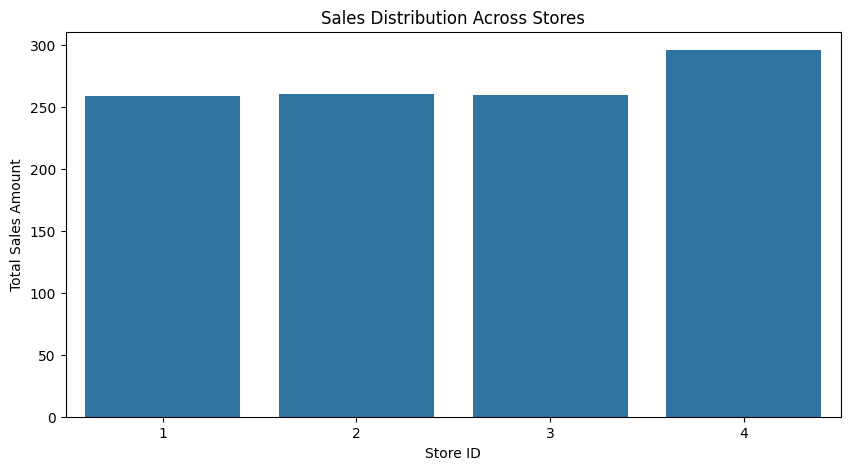

In [63]:

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x='Store ID', y='Sales Amount', ci=None)
plt.title("Sales Distribution Across Stores")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.show()


Printing Performance Comparison of Products

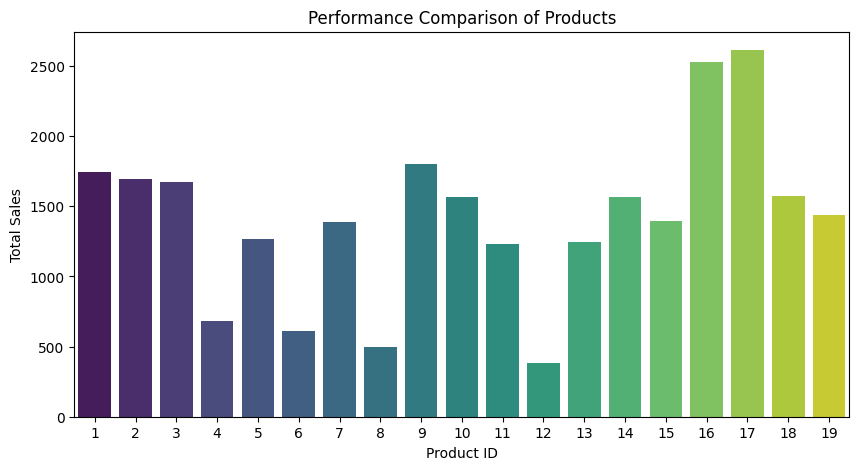

In [65]:
product_performance = sales_data.groupby('Product ID').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=product_performance, x='Product ID', y='Total_Sales', palette='viridis')
plt.title("Performance Comparison of Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

Printing Sales trends over time

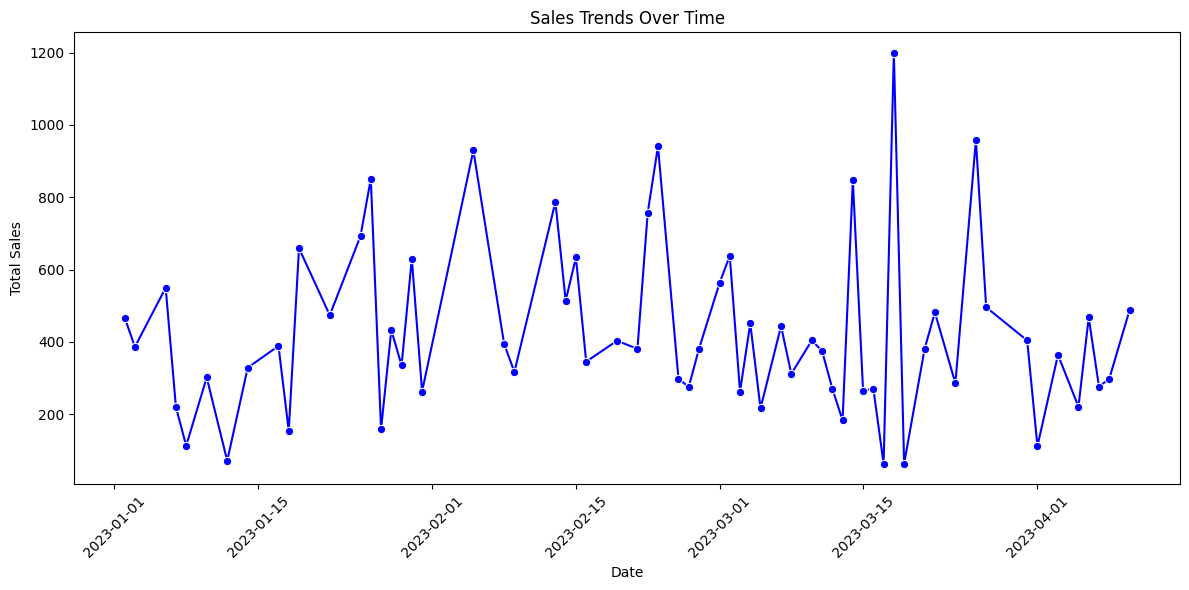

In [66]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=date_agg, x='Date', y='Total_Sales', color='blue', marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Printing Discount vs. Sales Elasticity Scatter Plot

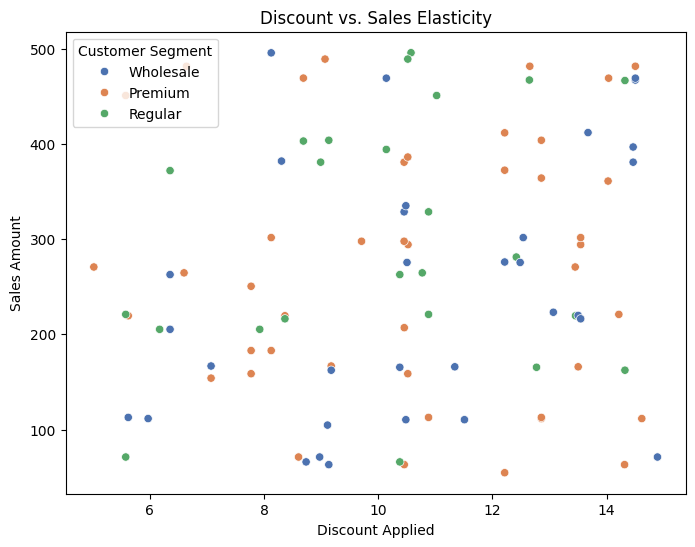

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_data, x='Discount Applied', y='Sales Amount', hue='Customer Segment', palette='deep')
plt.title("Discount vs. Sales Elasticity")
plt.xlabel("Discount Applied")
plt.ylabel("Sales Amount")
plt.legend(title="Customer Segment")
plt.show()

 Printing an Correlation Heatmap

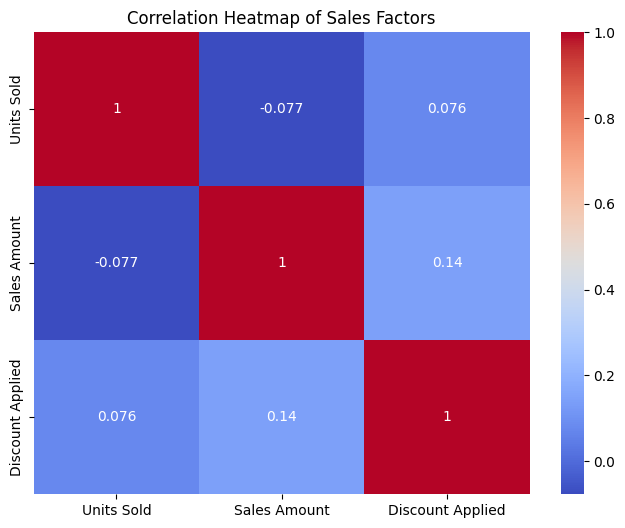

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_data[['Units Sold', 'Sales Amount', 'Discount Applied']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sales Factors")
plt.show()

## ** summary of all the tasks**

In [73]:
# Automated Summary Report with Recommendations
print("\n************* Summary Report***********\n")
print("1. Customer Segmentation Analysis:\n\n", customer_segment_agg)
print("\n2. Weekly and Monthly Sales Trends:\n\n", weekly_sales, "\n\n", monthly_sales)

print("\n\n")
print("\n3. Discount Elasticity Insights:\n\n", sales_data[['Discount Applied', 'Sales Amount', 'Elasticity']].dropna().describe())


************* Summary Report***********

1. Customer Segmentation Analysis:

   Customer Segment   Total_Sales   Avg_Sales   Units_Sold
0          Premium  11801.014306  268.204871  1708.212121
1          Regular   7213.928620  300.580359  1073.000000
2        Wholesale   7873.781906  246.055685  1640.000000

2. Weekly and Monthly Sales Trends:

     Week  Total_Sales
0      1  1735.293049
1      2   701.444862
2      3  1675.355490
3      4  2470.357063
4      5  1821.688845
5      6   711.004937
6      7  2682.294770
7      8  2651.900459
8      9  2510.940930
9     10  1804.759205
10    11  2890.572103
11    12  2106.210268
12    13  1011.081201
13    14  1626.677763
14    15   489.143885 

    Month  Total_Sales
0      1  7474.693572
1      2  7355.489793
2      3  9831.190709
3      4  2227.350758




3. Discount Elasticity Insights:

        Discount Applied  Sales Amount  Elasticity
count         99.000000     99.000000   99.000000
mean          10.492057    267.442433        -